#CREDIT CARD FRAUD DETECTION

##Name : Bala Swapnika Gopi

###Importing the necessary libraries

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, fbeta_score, f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

###Loading the dataset

In [ ]:
df_data = pd.read_csv("creditcard.csv")

#### Displaying the first 5 rows of the dataset

In [ ]:
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Checking for Missing Values in the Dataset

In [ ]:
df_data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There are no missing values in the dataset across all columns. That means the data is complete and does not require imputation or removal of any missing entries. We can move to other pre-processing or analysis steps.

###Generating a bar chart showing the count of 'Non-Fraudulent' and'Fraudulent' transaction classes from the dataset.


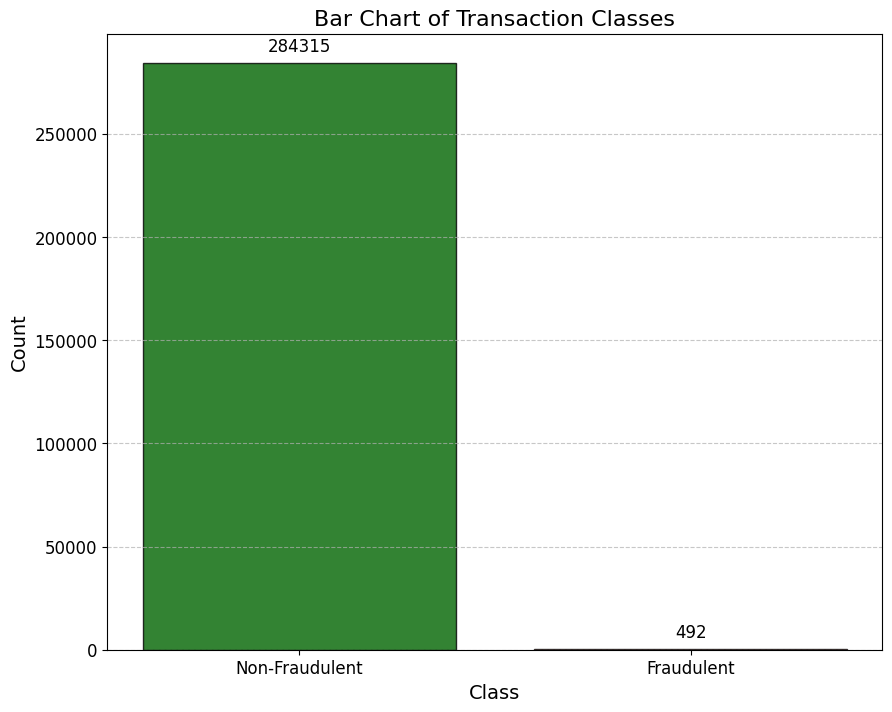

In [ ]:
# Count class occurrences
class_counts = df_data['Class'].value_counts()
labels = ['Non-Fraudulent', 'Fraudulent']
colors = ['darkgreen', 'salmon']
total = class_counts.sum()

# Bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Reduced figure size
bars = ax.bar(labels, class_counts, color=colors, edgecolor='black', alpha=0.8)

# Add counts above bars
for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02 * total, f'{count}', ha='center', fontsize=12, color='black')

# Style and labels
ax.set_title('Bar Chart of Transaction Classes', fontsize=16, color='black')
ax.set_ylabel('Count', fontsize=14, color='black')
ax.set_xlabel('Class', fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


This class imbalance presents a challenge to any machine learning model because it may be biased to predict the majority class (non-fraudulent). Special techniques such as oversampling the minority class of fraudulent cases, undersampling the majority class, or even using specialized algorithms (for example, weighted loss functions) may be required to effectively handle this imbalance.

###A heatmap visualizing the correlation matrix of the dataset.


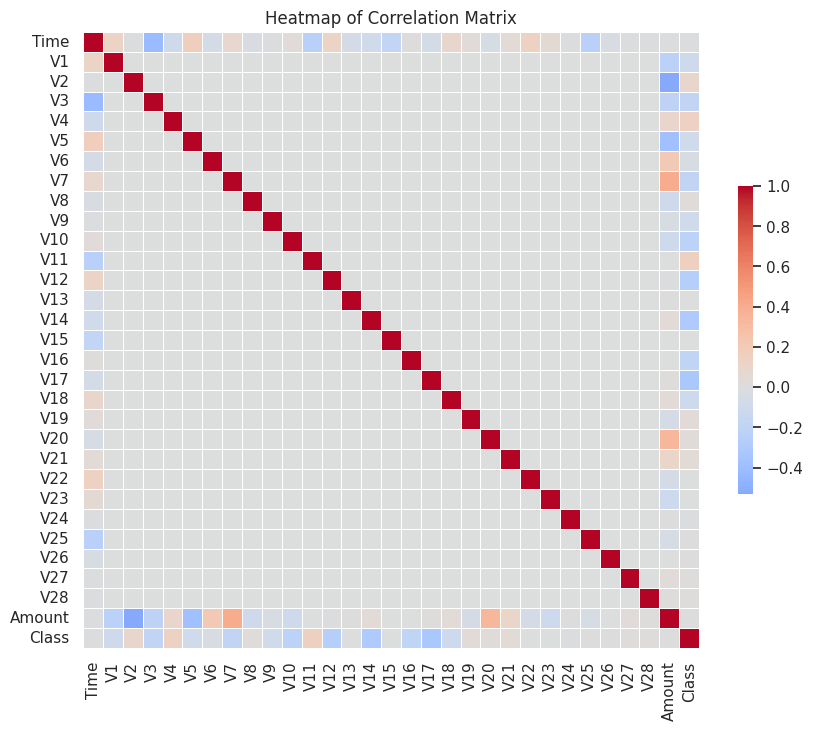

In [ ]:
#orrelation matrix for the dataset
corr = df_data.corr()

#Setting the style and creating a figure for the heatmap
sns.set(style="white")
plt.figure(figsize=(10, 8))

#Generating a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Matrix')
plt.show()

From the heat map we can say that most of the features are not strongly correlated with one another, which is good for many machine learning models. Given the weak linear correlations, nonlinear models-for example, decision trees, random forests, or neural networks-might perform better if the relationships between features and the target variable are nonlinear.

###Data Partitioning using sklearn's train_test_split

In [ ]:
# Separation into features (X) and labels (y)
# Dropping the 'Time' column (first column) as it has no effect on the output
# Using all columns except the last one as features, and the last column as labels
X, y = df_data.iloc[:, 1:-1].values, df_data.iloc[:, -1].values
print('First 5 samples:', X[:5])
print('First 5 labels:', y[:5])
print()

# Split configuration
test_size = 0.3      # Percentage of the data to be used for the test set (30%)
random_seed = 0      # Random seed for reproducibility of the split

# Data split using train_test_split
# Stratify ensures that the proportion of class labels in the train and test sets are the same as in the original data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y)

# Print train set information
print('Train data shape:', X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()


First 5 samples: [[-1.35980713e+00 -7.27811733e-02  2.53634674e+00  1.37815522e+00
  -3.38320770e-01  4.62387778e-01  2.39598554e-01  9.86979013e-02
   3.63786970e-01  9.07941720e-02 -5.51599533e-01 -6.17800856e-01
  -9.91389847e-01 -3.11169354e-01  1.46817697e+00 -4.70400525e-01
   2.07971242e-01  2.57905802e-02  4.03992960e-01  2.51412098e-01
  -1.83067779e-02  2.77837576e-01 -1.10473910e-01  6.69280749e-02
   1.28539358e-01 -1.89114844e-01  1.33558377e-01 -2.10530535e-02
   1.49620000e+02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01  4.48154078e-01
   6.00176493e-02 -8.23608088e-02 -7.88029833e-02  8.51016549e-02
  -2.55425128e-01 -1.66974414e-01  1.61272666e+00  1.06523531e+00
   4.89095016e-01 -1.43772296e-01  6.35558093e-01  4.63917041e-01
  -1.14804663e-01 -1.83361270e-01 -1.45783041e-01 -6.90831352e-02
  -2.25775248e-01 -6.38671953e-01  1.01288021e-01 -3.39846476e-01
   1.67170404e-01  1.25894532e-01 -8.98309914e-03  1.47241692e-02
   2.69000000e+00]
 [-1.35835406e+00 -1.

###Test Set Information

In [ ]:
print('Test data shape:', X_test.shape)
print('Test data labels, label count:', np.unique(y_test, return_counts=True))
print()

Test data shape: (85443, 29)
Test data labels, label count: (array([0, 1]), array([85295,   148]))



###Data Normalization Using sklearn's StandardScaler

In [ ]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming the train set and just transforming the test set
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Converting normalized data back to a DataFrame for better readability
df_X_train = pd.DataFrame(X_train_norm)
df_X_test = pd.DataFrame(X_test_norm)

# Assigning column names (excluding 'Time' and 'Class') from the original dataset
df_X_train.columns = list(df_data.columns[1:-1])
df_X_test.columns = list(df_data.columns[1:-1])

# Displaying the first few rows of the normalized train set
print(df_X_train.head())
print()

# Displaying the first few rows of the normalized test set
print(df_X_test.head())
print()



         V1        V2        V3        V4        V5        V6        V7  \
0 -4.269455  4.463420 -3.380758 -2.098445 -0.723928 -1.255387  0.327100   
1 -0.658708  0.461250 -0.112247 -1.193937  1.456020 -0.542735  1.370859   
2 -0.309824  0.141410  1.740207 -0.109342 -0.241759 -0.053969  0.142325   
3  0.700920 -0.198798  0.536968 -0.128694 -0.789142 -0.706442 -0.447246   
4 -1.095369 -4.583312 -3.257838  1.026322 -1.529655 -0.744970  2.983724   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.844811  4.818257  8.573201  ...  4.635419 -0.758935  0.480569  0.480316   
1 -0.193244 -0.873800 -0.625073  ...  0.073719  0.186554  0.537531 -1.075827   
2  0.093597  0.619073 -0.631719  ... -0.167699  0.008433  0.364616 -0.063018   
3 -0.293933  0.559673  0.074184  ...  0.100255 -0.184502  0.022107  0.005583   
4 -1.095416 -1.306463 -0.019975  ...  5.177760  1.729067 -1.184376 -3.346791   

        V24       V25       V26       V27       V28    Amount  
0  1

Normalization enhances the performance of algorithms sensitive to feature scales, for instance, gradient descent-based models (Logistic Regression and Neural Networks) and distance-based models (KNN, SVM). The reason why I fitted only on training dataset is Scaler must learn scaling parameters-mean and standard deviation only from the training set.
Fitting using a test set may lead to data leakage and, consequently, unreliable model evaluation.

###Displaying Training Data Shape and Label Distribution

In [ ]:
print('Train data shape:', df_X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()

Train data shape: (199364, 29)
Train data labels, label count: (array([0, 1]), array([199020,    344]))



From this we can say that Non-Fraduluent transactions are 199020 and Fraduluent transactions are 344. Hence the dataset is imbalanced and might lead to overfitting and it can be considered as biased towards the majority class. We can improve the class distribution by using Synthetic Minority Oversampling Technique (SMOTE).

###Handling Class Imbalance Using SMOTE

In [ ]:
# Importing SMOTE from imbalanced-learn
sm = SMOTE(random_state=42, k_neighbors=5)

# Applying SMOTE to the training data
X_res, y_res = sm.fit_resample(df_X_train, y_train)

# Converting the resampled features back to a DataFrame
df_X_train_res = pd.DataFrame(X_res)
df_X_train_res.columns = list(df_data.columns[1:-1])

# Displaying the resampled training data information
print('Train data shape:', df_X_train_res.shape)
print('Train data labels, label count:', np.unique(y_res, return_counts=True))
print()


Train data shape: (398040, 29)
Train data labels, label count: (array([0, 1]), array([199020, 199020]))



###Class Distribution Visualization After SMOTE

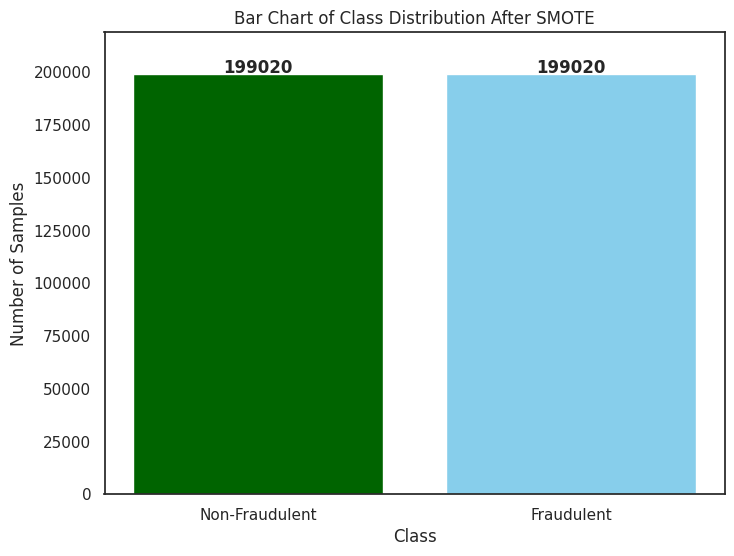

In [ ]:
# Class Distribution After SMOTE
class_counts_after_smote = pd.Series(y_res).value_counts()  # Counting class occurrences after SMOTE

# Bar Chart
plt.figure(figsize=(8, 6))
colors = ['darkgreen', 'skyblue']

# Create a bar plot
plt.bar(['Non-Fraudulent', 'Fraudulent'], class_counts_after_smote, color=colors)

# Adding value labels above the bars
for i, count in enumerate(class_counts_after_smote):
    plt.text(i, count + 500, f'{count}', ha='center', fontsize=12, fontweight='bold')

# Chart details
plt.title('Bar Chart of Class Distribution After SMOTE')
plt.ylabel('Number of Samples')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylim(0, max(class_counts_after_smote) * 1.1)

# Show the plot
plt.show()


SMOTE generates synthetic samples for the minority class by interpolating between existing samples. Once SMOTE is applied to this dataset, it becomes balanced, having an equal number of samples for both classes. In such cases, when the number of instances that belongs to the minority class is very few, SMOTE proves to be pretty helpful. Now, this resampled training data can be used for training different machine learning models without the risk of biased models toward the majority class. SMOTE Overcomes issues caused by class imbalance, such as poor model performance for the minority class, and it works by creating synthetic samples instead of duplicating existing ones, reducing the risk of overfitting.

###Model Training

###Logistic Regression without SMOTE.

In [ ]:
# Initializing the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Training the model
log_reg_model.fit(df_X_train, y_train)

# Display trained model
print('Model:', log_reg_model)



Model: LogisticRegression(max_iter=1000)


###Making Predictions with the Trained Logistic Regression Model

In [ ]:
# Making predictions on the testing set
y_pred = log_reg_model.predict(df_X_test)

# Output the predictions and their shape
print('Predictions:', y_pred)
print('Predictions\' shape:', y_pred.shape)

Predictions: [0 0 0 ... 0 0 0]
Predictions' shape: (85443,)


###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred) # accuracy
precision = precision_score(y_test, y_pred) # precision
recall = recall_score(y_test, y_pred) # recall
f1_lr = f1_score(y_test, y_pred) # F1-score

# Output the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_lr)

Accuracy: 0.9991456292499094
Precision: 0.8640776699029126
Recall: 0.6013513513513513
F1 Score: 0.7091633466135459


###Confusion Matrix for Model Evaluation

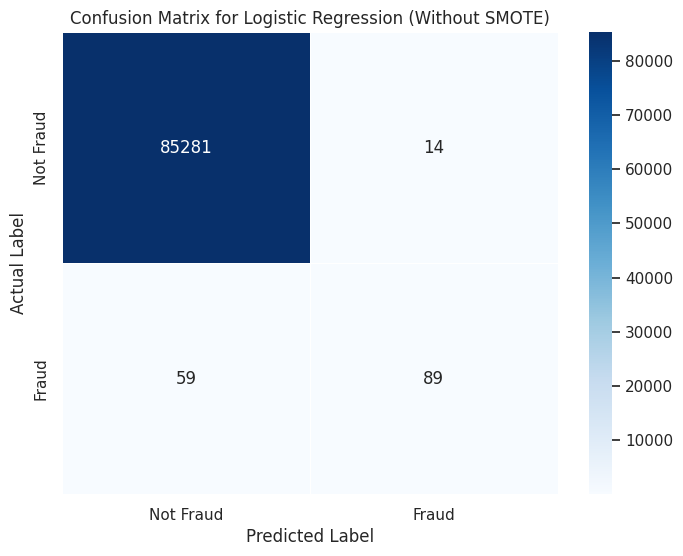

In [ ]:
#Computing Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression (Without SMOTE)')
plt.show()

###Logistic Regression with SMOTE

In [ ]:
# LR with SMOTE
# Initializing the logistic regression model
lr_model_smote = LogisticRegression(random_state=42)

# Training the model
lr_model_smote.fit(df_X_train_res, y_res)

# Display trained model
print('Model:', lr_model_smote)


Model: LogisticRegression(random_state=42)


###Making Predictions with the Trained Logistic Regression Model

In [ ]:
# Making predictions on the testing set
y_pred_lr_smote = lr_model_smote.predict(df_X_test)

# Output the predictions and their shape
print('Predictions:', y_pred_lr_smote)
print('Predictions\' shape:', y_pred_lr_smote.shape)

Predictions: [0 0 0 ... 0 0 0]
Predictions' shape: (85443,)


###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_lr_smote = accuracy_score(y_test, y_pred_lr_smote) # accuracy
precision_lr_smote = precision_score(y_test, y_pred_lr_smote) # precision
recall_lr_smote = recall_score(y_test, y_pred_lr_smote) # recall
f1_score_lr_smote = fbeta_score(y_test, y_pred_lr_smote, beta=1.0) # F1-score

# Output the results
print("Logistic Regression Model with SMOTE:")
print("Accuracy:", accuracy_lr_smote)
print("Precision:", precision_lr_smote)
print("Recall:", recall_lr_smote)
print("F1 Score:", f1_score_lr_smote)

Logistic Regression Model with SMOTE:
Accuracy: 0.9759722856173121
Precision: 0.06126209120221096
Recall: 0.8986486486486487
F1 Score: 0.11470461405778352


###Confusion Matrix for Model Evaluation

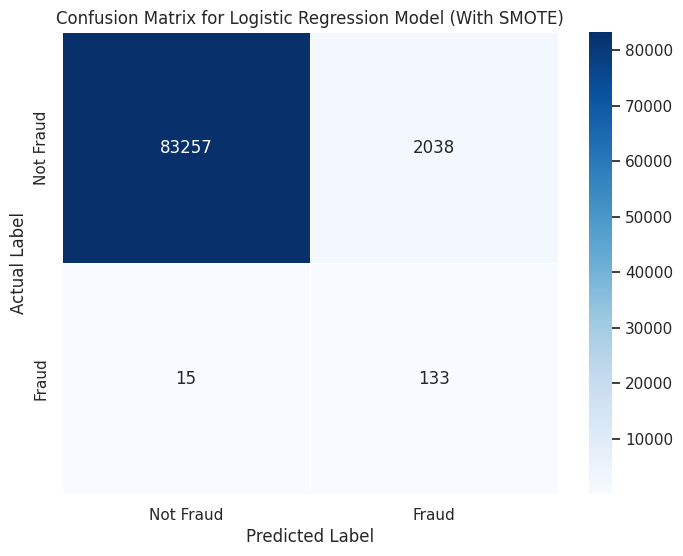

In [ ]:
#Computing Consusion Matrix
cm_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_smote, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression Model (With SMOTE)')
plt.show()

###Comparing Logistic Regression Model Metrics with and without SMOTE

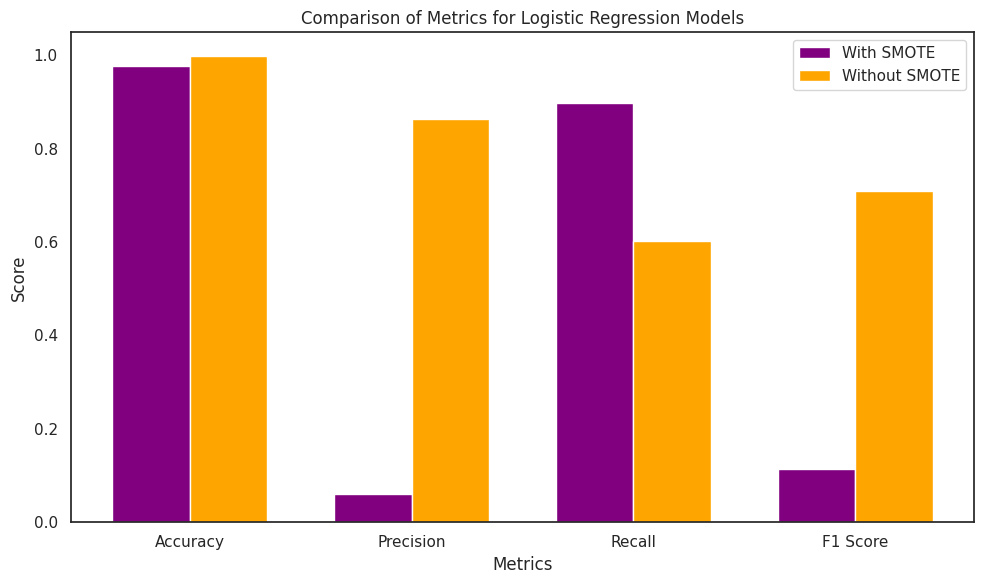

In [ ]:
# Metrics for Logistic Regression without SMOTE
metrics_no_smote = {
    'Accuracy': accuracy,  # Accuracy without SMOTE
    'Precision': precision,  # Precision without SMOTE
    'Recall': recall,  # Recall without SMOTE
    'F1 Score': f1_lr  # F1 score without SMOTE
}

# Metrics for Logistic Regression with SMOTE
metrics_smote = {
    'Accuracy': accuracy_lr_smote,  # Accuracy with SMOTE
    'Precision': precision_lr_smote,  # Precision with SMOTE
    'Recall': recall_lr_smote,  # Recall with SMOTE
    'F1 Score': f1_score_lr_smote  # F1 score with SMOTE
}

# Prepare metric names and values
metrics_names = list(metrics_smote.keys())  # Metric names
metrics_values_smote = list(metrics_smote.values())  # SMOTE values
metrics_values_no_smote = list(metrics_no_smote.values())  # Non-SMOTE values
num_metrics = len(metrics_names)  # Number of metrics

# Bar plot
x = range(num_metrics)
bar_width = 0.35


plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE',color = 'purple')
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE', color = 'orange')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Logistic Regression Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


###SVM Classifier with Polynomial Kernel of Degree 3 with SMOTE

In [ ]:
# Polynomial Kernel of Degree 3

# SVM configuration
phi = 'poly'   # Polynomial kernel
phi_degree = 3 # Degree of the polynomial kernel
c = 1.0        # Regularization parameter

# Initialize and train SVM model
svm = SVC(kernel=phi, degree=phi_degree, C=c)
svm.fit(df_X_train_res, y_res.ravel())

# Display trained model
print('Model:', svm)


Model: SVC(kernel='poly')


###Making Predictions with the Trained SVM Model

In [ ]:
# Making predictions on the test data using the trained SVM model
predictions = svm.predict(df_X_test)

# Output the predictions and their shape
print('Predictions:', predictions)
print('Predictions\' shape:', predictions.shape)


Predictions: [0 0 0 ... 0 0 0]
Predictions' shape: (85443,)


###Confusion Matrix for Model Evaluation

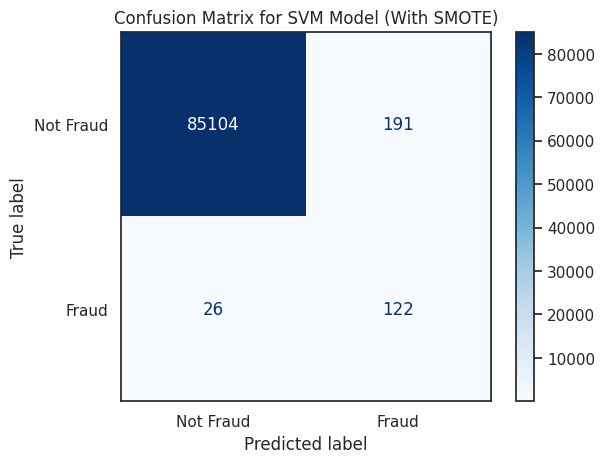

In [ ]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=[0, 1])

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model (With SMOTE)')
plt.show()


###Calculating Balanced Accuracy

In [ ]:
# Calculating balanced accuracy
baccuracy = balanced_accuracy_score(y_test, predictions)

# Output the balanced accuracy
print('Balanced Accuracy:', baccuracy)


Balanced Accuracy: 0.9110425185722683


###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
a = accuracy_score(y_test, predictions)  # accuracy
p = precision_score(y_test, predictions)  # precision
r = recall_score(y_test, predictions)     # recall
f1 = fbeta_score(y_test, predictions, beta=1.0)  # F1-score

# Output the results
print('Accuracy with SMOTE:', a)
print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

Accuracy with SMOTE: 0.9974602951675386
Precision: 0.38977635782747605
Recall: 0.8243243243243243
F1-score: 0.5292841648590022


###Support Vector Machine without SMOTE

In [ ]:
# Polynomial Kernel of Degree 3

# SVM classifier configuration
phi = 'poly'   # Use polynomial kernel
phi_degree = 3 # Degree of polynomial kernel
c = 1.0        # Regularization parameter (C)

# Initialize and train SVM model
svm_1 = SVC(kernel=phi, degree=phi_degree, C=c)
svm_1.fit(df_X_train, y_train.ravel())

# Display the trained model
print('Model:', svm_1)


Model: SVC(kernel='poly')


###Making Predictions with the Trained SVM Model

In [ ]:
# Making predictions on the test data using the trained SVM model
predictions_1 = svm_1.predict(df_X_test)

# Output the predictions and their shape
print('Predictions:', predictions_1)
print('Predictions\' shape:', predictions_1.shape)

Predictions: [0 0 0 ... 0 0 0]
Predictions' shape: (85443,)


###Confusion Matrix for Model Evaluation

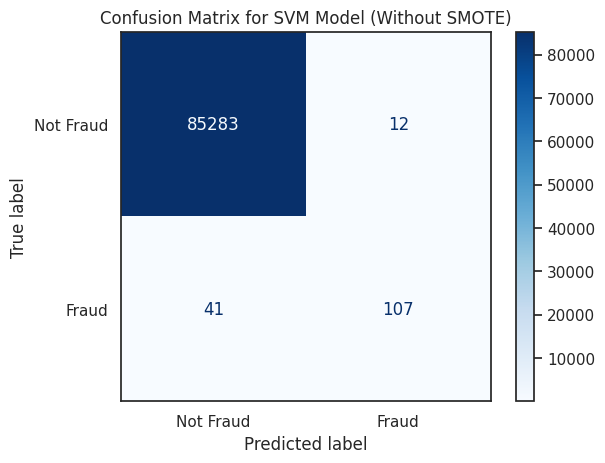

In [ ]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, predictions_1, labels=[0,1])

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud','Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model (Without SMOTE)')
plt.show()

###Calculating Balanced Accuracy

In [ ]:
# Calculating balanced accuracy
baccuracy_1 = balanced_accuracy_score(y_test, predictions_1)

# Output the balanced accuracy
print('Balance Accuracy:', baccuracy_1)


Balance Accuracy: 0.8614161423865979


###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
a2 = accuracy_score(y_test, predictions_1)  # accuracy
p2 = precision_score(y_test, predictions_1) # precision
r2 = recall_score(y_test, predictions_1 )  # recall
f1_2 = fbeta_score(y_test, predictions_1, beta=1.0) # F1-score


# Output the results
print('Accuracy without SMOTE:', a2)
print('Precision:', p2)
print('Recall:', r2)
print('F1-score:', f1_2)

Accuracy without SMOTE: 0.9993797034280163
Precision: 0.8991596638655462
Recall: 0.722972972972973
F1-score: 0.8014981273408239


###Comparing SVM Model Metrics with and without SMOTE

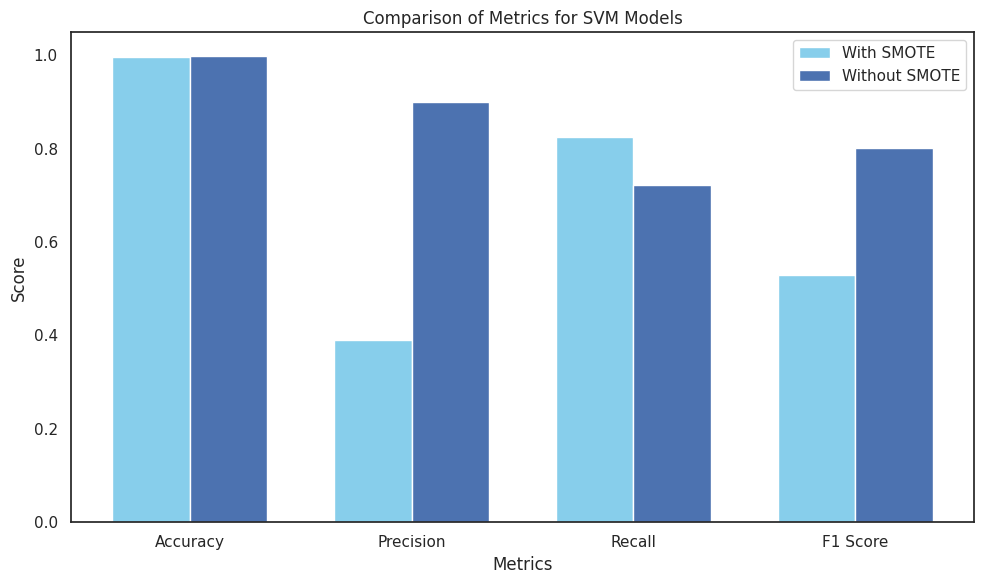

In [ ]:
# SVM Model with SMOTE metrics
metrics_smote = {
    'Accuracy': a,         # Accuracy with SMOTE
    'Precision': p,        # Precision with SMOTE
    'Recall': r,           # Recall with SMOTE
    'F1 Score': f1         # F1-score with SMOTE
}

# SVM Model without SMOTE metrics
metrics_no_smote = {
    'Accuracy': a2,        # Accuracy without SMOTE
    'Precision': p2,       # Precision without SMOTE
    'Recall': r2,          # Recall without SMOTE
    'F1 Score': f1_2       # F1-score without SMOTE
}

# Metric names & values for plotting
metrics_names = list(metrics_smote.keys())             # List of metric names
metrics_values_smote = list(metrics_smote.values())    # Metric values with SMOTE
metrics_values_no_smote = list(metrics_no_smote.values())  # Metric values without SMOTE
num_metrics = len(metrics_names)                       # Total number of metrics

x = range(num_metrics)
bar_width = 0.35

# Bar plot for comparing SVM metrics with and without SMOTE
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE', color='skyblue')  # Plot metrics with SMOTE
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE')  # Plot metrics without SMOTE
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for SVM Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

plt.tight_layout()
plt.show()


###Decision Tree With SMOTE

In [ ]:
# Train Decision Tree Model

dt_model = DecisionTreeClassifier(random_state=42)  # Initialize the model
dt_model.fit(df_X_train_res, y_res)  # Train on resampled data (with SMOTE)

print('Trained Decision Tree Model (With SMOTE):', dt_model)

#Make predictions on test data
y_pred_dt = dt_model.predict(df_X_test)
print('Shape of Predictions:', y_pred_dt.shape)

# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred_dt))


Trained Decision Tree Model (With SMOTE): DecisionTreeClassifier(random_state=42)
Shape of Predictions: (85443,)
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.37      0.76      0.50       148

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Accuracy, Precision, Recall, F1-Score for Decision Tree Model
accuracy_dt = accuracy_score(y_test, y_pred_dt)  #accuracy
precision_dt = precision_score(y_test, y_pred_dt)  # precision
recall_dt = recall_score(y_test, y_pred_dt)  # recall
f1_score_dt = fbeta_score(y_test, y_pred_dt, beta=1.0)  # F1-score

# Output the metrics
print('Accuracy with SMOTE:', accuracy_dt)
print('Recall with SMOTE:', recall_dt)
print('Precision with SMOTE:', precision_dt)
print('F1 Score with SMOTE:', f1_score_dt)

Accuracy with SMOTE: 0.9973666654962958
Recall with SMOTE: 0.7567567567567568
Precision with SMOTE: 0.37209302325581395
F1 Score with SMOTE: 0.49888641425389757


###Confusion Matrix for Model Evaluation

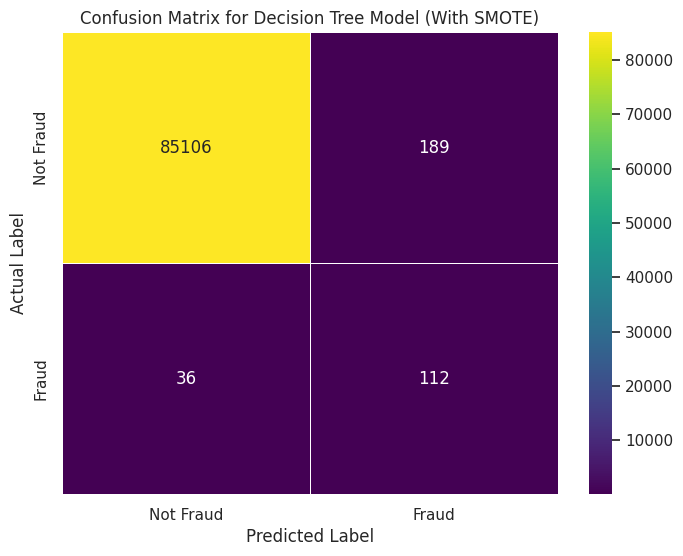

In [ ]:
# Confusion Matrix for Decision Tree Model

cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", linewidths=.5, cmap='viridis',  # Heatmap with annotations
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree Model (With SMOTE)')
plt.show()


###Decision Tree Without SMOTE

In [ ]:
# Configuration and training of Decision Tree model without SMOTE

dt_model_no_smote = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree model without SMOTE
dt_model_no_smote.fit(X_train_norm, y_train)  # Train the model on normalized training data

print('Trained Decision Tree Model (without SMOTE):', dt_model_no_smote)

# Make predictions on test data
y_pred_dt_no_smote = dt_model_no_smote.predict(df_X_test)

# Classification report without SMOTE
print('Classification Report (without SMOTE):\n', classification_report(y_test, y_pred_dt_no_smote))


Trained Decision Tree Model (without SMOTE): DecisionTreeClassifier(random_state=42)
Classification Report (without SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.75      0.78       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Accuracy, Precision, Recall, and F1-Score without SMOTE

accuracy_dt_no_smote = accuracy_score(y_test, y_pred_dt_no_smote)  # accuracy
precision_dt_no_smote = precision_score(y_test, y_pred_dt_no_smote)  # precision
recall_dt_no_smote = recall_score(y_test, y_pred_dt_no_smote)  # recall
f1_score_dt_no_smote = f1_score(y_test, y_pred_dt_no_smote)  # F1-score

# Display the metrics
print('Accuracy of the Model (without SMOTE):', accuracy_dt_no_smote)
print('Recall (without SMOTE):', recall_dt_no_smote)
print('Precision (without SMOTE):', precision_dt_no_smote)
print('F1 Score (without SMOTE):', f1_score_dt_no_smote)


Accuracy of the Model (without SMOTE): 0.9992509626300574
Recall (without SMOTE): 0.75
Precision (without SMOTE): 0.8043478260869565
F1 Score (without SMOTE): 0.7762237762237763


###Confusion Matrix for Model Evaluation

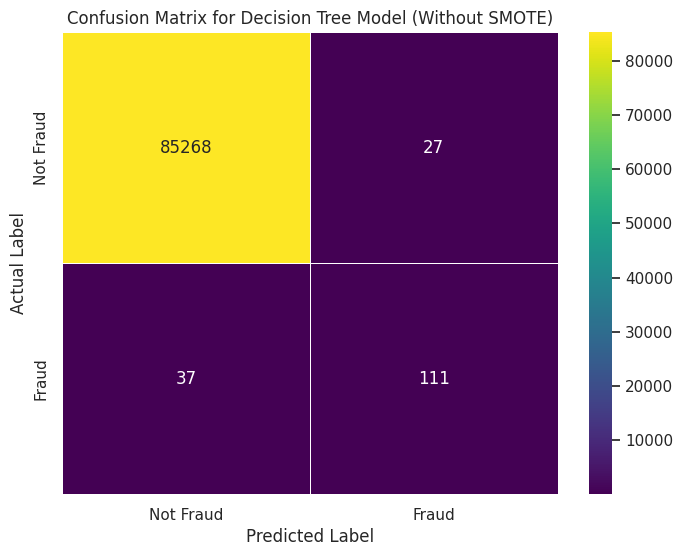

In [ ]:
# Confusion Matrix for Decision Tree Model without SMOTE

cm_dt_no_smote = confusion_matrix(y_test, y_pred_dt_no_smote)  # Compute confusion matrix for Decision Tree without SMOTE

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_no_smote, annot=True, fmt="d", linewidths=.5, cmap='viridis',  # Create heatmap with annotations
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])  # Label the axes
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree Model (Without SMOTE)')
plt.show()


###Comparing Decision tree Model Metrics with and without SMOTE

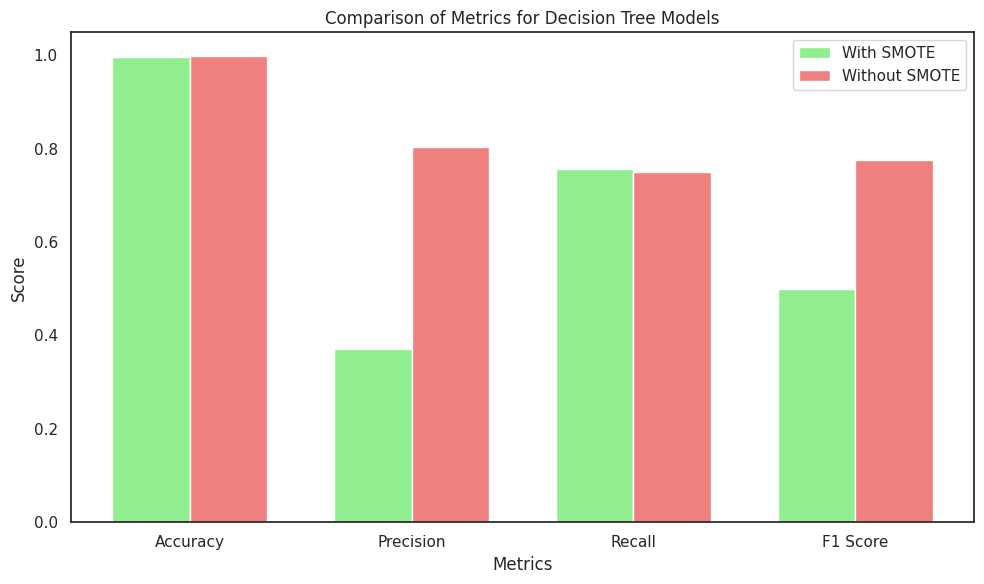

In [ ]:
# Decision Tree Model with SMOTE Metrics
metrics_smote = {
    'Accuracy': accuracy_dt,  # Accuracy with SMOTE
    'Precision': precision_dt,  # Precision with SMOTE
    'Recall': recall_dt,  # Recall with SMOTE
    'F1 Score': f1_score_dt  # F1 Score with SMOTE
}

# Decision Tree Model without SMOTE Metrics
metrics_no_smote = {
    'Accuracy': accuracy_dt_no_smote,  # Accuracy without SMOTE
    'Precision': precision_dt_no_smote,  # Precision without SMOTE
    'Recall': recall_dt_no_smote,  # Recall without SMOTE
    'F1 Score': f1_score_dt_no_smote  # F1 Score without SMOTE
}

# Prepare data for plotting
metrics_names = list(metrics_smote.keys())  # List of metric names
metrics_values_smote = list(metrics_smote.values())  # Metric values with SMOTE
metrics_values_no_smote = list(metrics_no_smote.values())  # Metric values without SMOTE
num_metrics = len(metrics_names)  # Number of metrics to plot

x = range(num_metrics)
bar_width = 0.35

# Create bar plot comparing metrics with and without SMOTE
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE', color='lightgreen')
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE', color='lightcoral')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Decision Tree Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

plt.tight_layout()
plt.show()


### KNN With SMOTE

In [ ]:
# Initializing the KNN classifier with 5 neighbors
knn_model_smote = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model with SMOTE-resampled data
knn_model_smote.fit(df_X_train_res, y_res)

# Making predictions on the test set
y_pred_knn_smote = knn_model_smote.predict(df_X_test)

###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Calculating Accuracy, Precision, Recall, and F1 Score for the KNN model with SMOTE
accuracy_knn_smote = accuracy_score(y_test, y_pred_knn_smote) # Accuracy
precision_knn_smote = precision_score(y_test, y_pred_knn_smote) # Precision
recall_knn_smote = recall_score(y_test, y_pred_knn_smote) # Recall
f1_score_knn_smote = fbeta_score(y_test, y_pred_knn_smote, beta=1.0) # F1 Score

# Displaying the model's performance metrics
print("KNN Model with SMOTE:")
print("Accuracy:", accuracy_knn_smote)
print("Precision:", precision_knn_smote)
print("Recall:", recall_knn_smote)
print("F1 Score:", f1_score_knn_smote)

KNN Model with SMOTE:
Accuracy: 0.9983614807532507
Precision: 0.5169491525423728
Recall: 0.8243243243243243
F1 Score: 0.6354166666666666


###Confusion Matrix for Model Evaluation

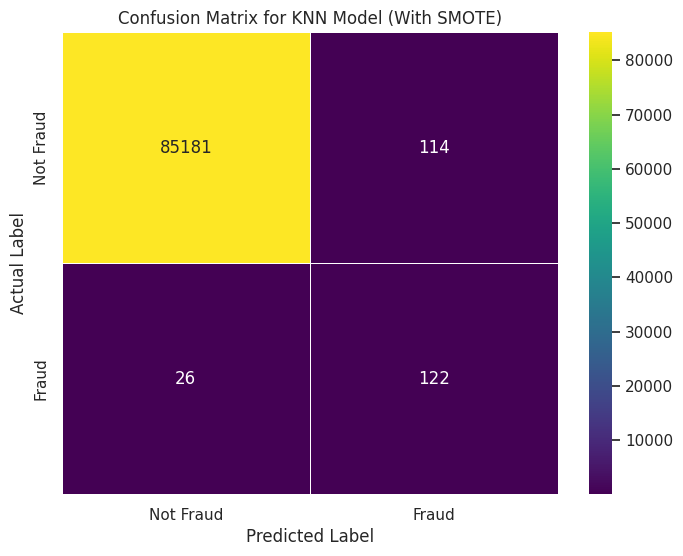

In [ ]:
# Generating the confusion matrix for the KNN model with SMOTE
cm_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_smote, annot=True, fmt="d", linewidths=.5, cmap='viridis', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN Model (With SMOTE)')
plt.show()

### KNN Without SMOTE

In [ ]:
# Initializing the KNN classifier with 5 neighbors
knn_model_no_smote = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model without SMOTE
knn_model_no_smote.fit(df_X_train, y_train)

# Making predictions on the test set
y_pred_knn_no_smote = knn_model_no_smote.predict(df_X_test)

###Calculating Precision, Recall, F1-score, and Accuracy

In [ ]:
# Calculating Accuracy, Precision, Recall, and F1 Score for the KNN model without SMOTE
accuracy_knn_no_smote = accuracy_score(y_test, y_pred_knn_no_smote) # Accuracy
precision_knn_no_smote = precision_score(y_test, y_pred_knn_no_smote) # Precision
recall_knn_no_smote = recall_score(y_test, y_pred_knn_no_smote) # Recall
f1_score_knn_no_smote = fbeta_score(y_test, y_pred_knn_no_smote, beta=1.0) # F1 Score

# Displaying the model's performance metrics
print("KNN Model without SMOTE:")
print("Accuracy:", accuracy_knn_no_smote)
print("Precision:", precision_knn_no_smote)
print("Recall:", recall_knn_no_smote)
print("F1 Score:", f1_score_knn_no_smote)


KNN Model without SMOTE:
Accuracy: 0.9994616293903538
Precision: 0.9473684210526315
Recall: 0.7297297297297297
F1 Score: 0.8244274809160306


###Confusion Matrix for Model Evaluation

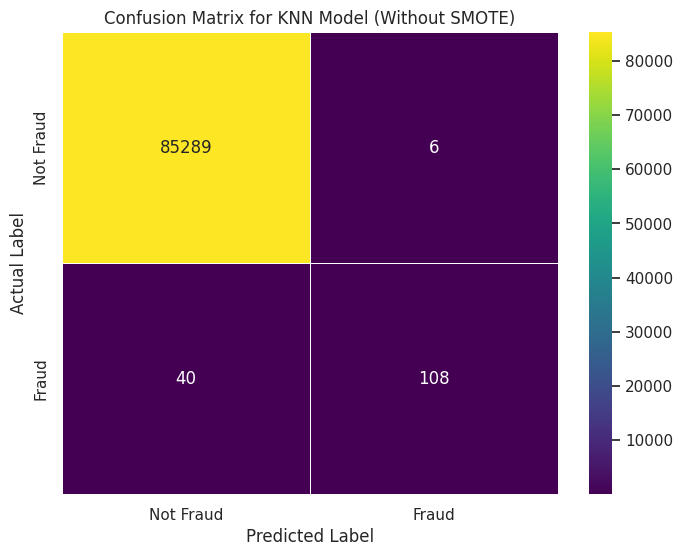

In [ ]:
# Generating the confusion matrix for the KNN model without SMOTE
cm_knn_no_smote = confusion_matrix(y_test, y_pred_knn_no_smote)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_no_smote, annot=True, fmt="d", linewidths=.5, cmap='viridis', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN Model (Without SMOTE)')
plt.show()

###Comparing KNN Model Metrics with and without SMOTE

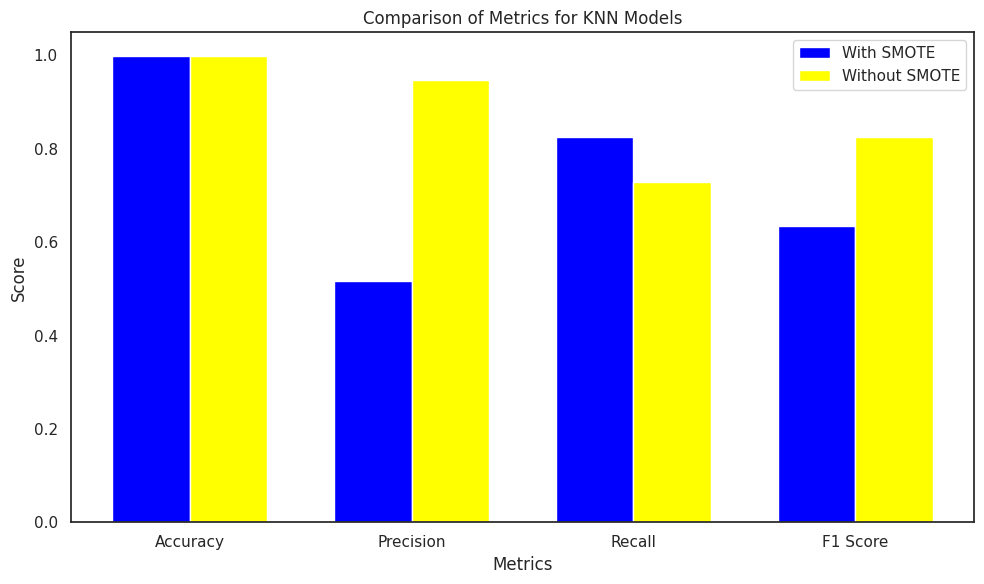

In [ ]:
# Metrics for KNN without SMOTE
metrics_no_smote = {
    'Accuracy': accuracy_knn_no_smote,  # Accuracy without SMOTE
    'Precision': precision_knn_no_smote,  # Precision without SMOTE
    'Recall': recall_knn_no_smote,  # Recall without SMOTE
    'F1 Score': f1_score_knn_no_smote  # F1 score without SMOTE
}

# Metrics for KNN with SMOTE
metrics_smote = {
    'Accuracy': accuracy_knn_smote,  # Accuracy with SMOTE
    'Precision': precision_knn_smote,  # Precision with SMOTE
    'Recall': recall_knn_smote,  # Recall with SMOTE
    'F1 Score': f1_score_knn_smote  # F1 score with SMOTE
}

# Prepare metric names and values for plotting
metrics_names = list(metrics_smote.keys())  # List of metric names
metrics_values_smote = list(metrics_smote.values())  # SMOTE metrics values
metrics_values_no_smote = list(metrics_no_smote.values())  # Non-SMOTE metrics values
num_metrics = len(metrics_names)  # Number of metrics to plot

# Bar plot
x = range(num_metrics)
bar_width = 0.35

# Bar plot for comparing KNN metrics with and without SMOTE
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE', color='blue')
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE', color='yellow')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for KNN Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


###Creating a dictionary with model metrics for various models with and without SMOTE

In [ ]:
data = {
    'Model': [
        'SVM (with SMOTE)', 'SVM (without SMOTE)',
        'Decision Tree (with SMOTE)', 'Decision Tree (without SMOTE)',
        'Logistic Regression (with SMOTE)', 'Logistic Regression (without SMOTE)',
        'KNN (with SMOTE)', 'KNN (without SMOTE)'
    ],
    'Accuracy': [
        a, a2,
        accuracy_dt, accuracy_dt_no_smote,
        accuracy_lr_smote, accuracy,
        accuracy_knn_smote, accuracy_knn_no_smote
    ],
    'Precision': [
        p, p2,
        precision_dt, precision_dt_no_smote,
        precision_lr_smote, precision,
        precision_knn_smote, precision_knn_no_smote
    ],
    'Recall': [
        r, r2,
        recall_dt, recall_dt_no_smote,
        recall_lr_smote, recall,
        recall_knn_smote, recall_knn_no_smote
    ],
    'F1 Score': [
        f1, f1_2,
        f1_score_dt, f1_score_dt_no_smote,
        f1_score_lr_smote, f1_lr,
        f1_score_knn_smote, f1_score_knn_no_smote
    ]
}

# Creating a DataFrame from the dictionary
df_metrics = pd.DataFrame(data)

# Setting 'Model' as the index of the DataFrame
df_metrics.set_index('Model', inplace=True)

# Display the DataFrame
print(df_metrics)


                                     Accuracy  Precision    Recall  F1 Score
Model                                                                       
SVM (with SMOTE)                     0.997460   0.389776  0.824324  0.529284
SVM (without SMOTE)                  0.999380   0.899160  0.722973  0.801498
Decision Tree (with SMOTE)           0.997367   0.372093  0.756757  0.498886
Decision Tree (without SMOTE)        0.999251   0.804348  0.750000  0.776224
Logistic Regression (with SMOTE)     0.975972   0.061262  0.898649  0.114705
Logistic Regression (without SMOTE)  0.999146   0.864078  0.601351  0.709163
KNN (with SMOTE)                     0.998361   0.516949  0.824324  0.635417
KNN (without SMOTE)                  0.999462   0.947368  0.729730  0.824427


###Calculating the correlation matrix for the resampled training data

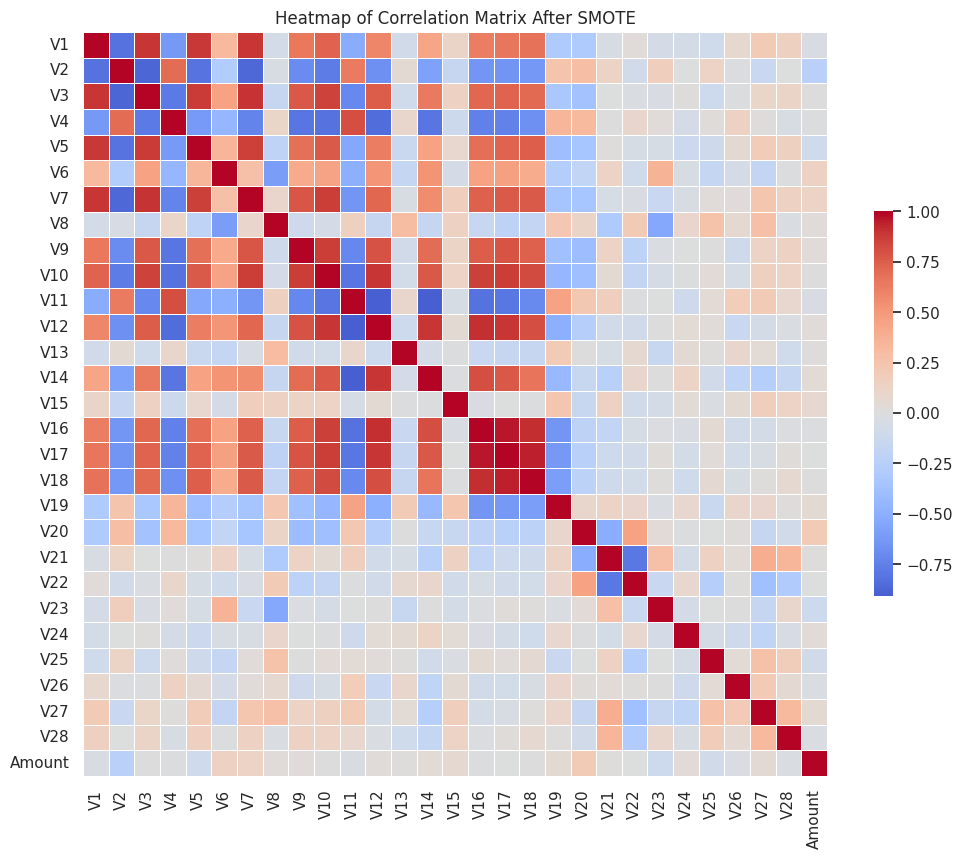

In [ ]:
corr_resampled = df_X_train_res.corr()
sns.set(style="white")

# Creating a figure for the heatmap
plt.figure(figsize=(12, 10))

# Plotting the heatmap of the correlation matrix
sns.heatmap(corr_resampled, cmap="coolwarm", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding a title to the heatmap
plt.title('Heatmap of Correlation Matrix After SMOTE')

# Displaying the heatmap
plt.show()


###Before SMOTE
The original correlation matrix is mostly low values of correlation between the features, with a few isolated strong positive (red) or negative (blue) correlations.

###After SMOTE
The correlation matrix after applying SMOTE indicates stronger correlations between features, with a wider range of positive and negative values. Some features that previously had weak correlations now indicate moderate to strong correlations, both positive and negative. This may indicate that SMOTE introduced new relationships between features, especially within the synthetic data. SMOTE can alter the distribution of features and their relationships. This explains the noticeable changes in the correlation structure.
While SMOTE helps balance the classes, it may introduce biases since it generates synthetic data that does not fully capture the actual feature relationships.

###Models Comparision

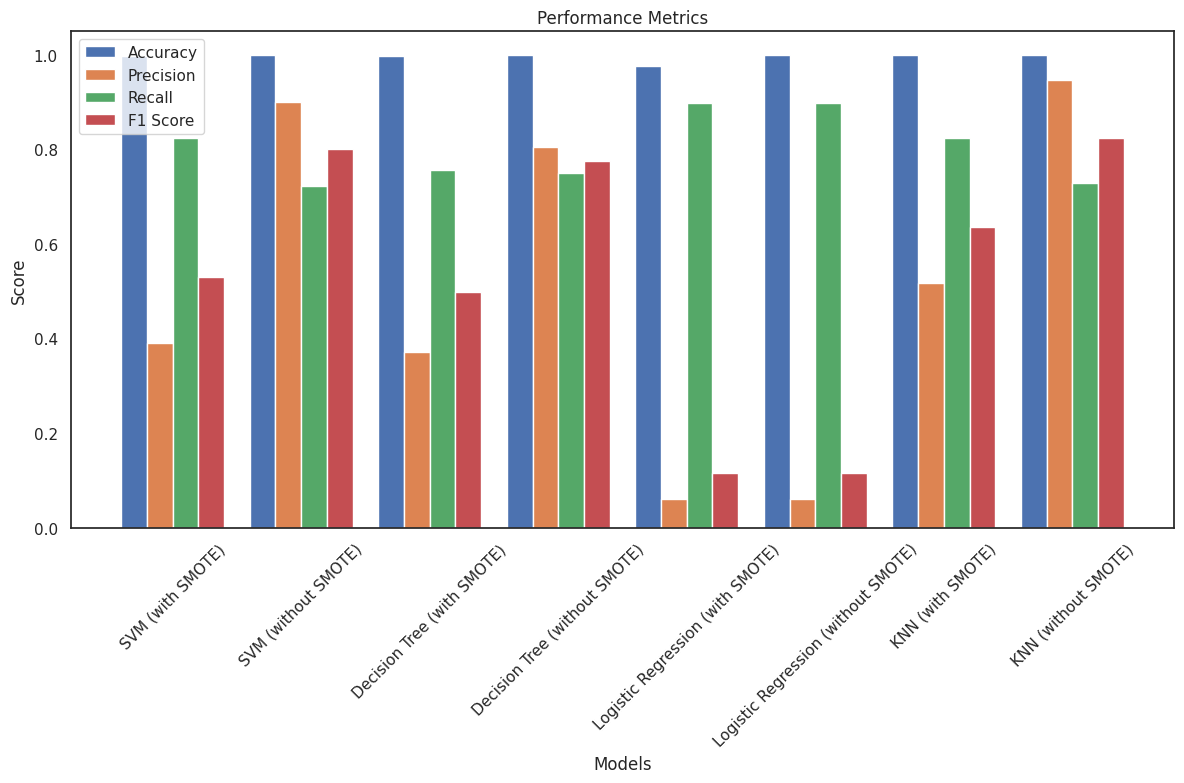

In [ ]:
# Define the models and their corresponding performance metrics
models = ['SVM (with SMOTE)', 'SVM (without SMOTE)', 'Decision Tree (with SMOTE)', 'Decision Tree (without SMOTE)', 'Logistic Regression (with SMOTE)', 'Logistic Regression (without SMOTE)', 'KNN (with SMOTE)', 'KNN (without SMOTE)']
accuracy = [a, a2, accuracy_dt, accuracy_dt_no_smote, accuracy_lr_smote, accuracy, accuracy_knn_smote, accuracy_knn_no_smote]
precision = [p, p2, precision_dt, precision_dt_no_smote, precision_lr_smote, precision_lr_smote, precision_knn_smote, precision_knn_no_smote]
recall = [r, r2, recall_dt, recall_dt_no_smote, recall_lr_smote, recall_lr_smote, recall_knn_smote, recall_knn_no_smote]
f1_score = [f1, f1_2, f1_score_dt, f1_score_dt_no_smote, f1_score_lr_smote, f1_score_lr_smote, f1_score_knn_smote, f1_score_knn_no_smote]

# Create a subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Set bar width and index for the x-axis
bar_width = 0.2
index = range(len(models))

# Plotting bars for each metric (Accuracy, Precision, Recall, F1 Score)
plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')
plt.bar([i + 3 * bar_width for i in index], f1_score, bar_width, label='F1 Score')

# Labeling the plot
plt.xlabel('Models')  # X-axis label
plt.ylabel('Score')  # Y-axis label
plt.title('Performance Metrics')  # Plot title
plt.xticks([i + 1.5 * bar_width for i in index], models, rotation=45)  # X-axis tick labels
plt.legend()  # Display legend

# Ensure proper spacing and display the plot
plt.tight_layout()
plt.show()
